# COGS 108 - EDA Checkpoint

# Names

- Maria Dhilla
- Eunice Lee
- Prem Shelat
- Maryam Amin
- Najma Adeeb

<a id='research_question'></a>
# Research Question

*need to edit - figure out if there's a correlational relationship*

Based on the past 20 years, what will be the US National Park visitation rates within the Pacific-West and Intermountain Regions over the next 5 years?

# Background & Prior Work

<b>Why it is of interest to us.</b>

As a group we are passionate about the welfare of our National Park’s system. Established in 1916 by President Wilson, the creation of the National Park Service ushered in a new era of environmentalism ensuring the safety of our nation's natural beauty.

During the last few decades, several heavily trafficked national parks, such as Yosemite, have experienced tourist overcrowding and understaffing that was exacerbated by the pandemic. Based on research done by researchers published in Biological Conservation, there has been a shift in the way national parks are operated due to the pandemic, mainly due to reduced staff and pandemic related closures (4).

Our group came to realize that we all enjoy spending time outdoors in nature, whether it be hiking, running, biking, or merely going for long walks. A few of us have visited many national parks and, after discussing with park rangers, know firsthand the resources and staffing required to maintain them. This inspired us to investigate how the recent emergence of COVID-19 plays into the visitation of these landmarks.

<b>What background information led you to your hypothesis?</b>
By the time it was summer of 2020, restrictions were lifted and many people drove to national parks. There was about a 335% increase in park visits nationally in July of 2020 compared to May of 2020 (4). It can be assumed that most of these visitors traveled by car due to air travel restrictions as well as the fear of air travel that was prevalent in mid-2020, and therefore, visitation may have increased. CNN reports have also shown that in June 2021, visitation, hiking, and camping numbers increased between 2019 and 2021 (8).

In addition to record breaking visitation rates after the emergence of the pandemic, many national parks typically receive large crowds of visitors during the summer time already. During summer months such as June and July, many families opt to go on road trips to a national park as this time coincides with most schools’ summer vacation times. Therefore, it is also important to consider and analyze national park visitation during certain seasons.

<b>Why is this important?</b>
Overcrowding at national parks lead to several consequences for both tourists and the land itself. Many tourists enjoy taking pictures during their trips to the parks, but certain ideal photo spots can be overrun by tourists who don’t know proper procedures for visitation. A tragic example of this would be the death of a man from Phoenix who fell to his death at the very popular Horseshoe Bend, which has a steep open cliff edge . Another example would be the fact that many tourists have “tossed rocks and debris into Yellowstone’s sensitive geothermal features, which risks destroying them forever” (9). The land is also affected by overcrowding. One example of this would be when too many people walked around the famous Sequoia trees and damaged their roots at Yosemite (10). This issue becomes a bigger problem when taking into consideration recent budget cuts and understaffing due to the COVID-19 pandemic, despite record setting visitation numbers (11).

Analyzing the impact of the past twenty years and the COVID-19 restrictions on national parks would help us better understand how the national parks system should take various travel and health restrictions into consideration in the near future. Studying these impacts will also help national parks have a better idea of how busy they will be for the next few years and help them prepare to meet those crowds. Our project aims to solidify the link between the restrictions brought on by the pandemic and the increase of tourism in National Parks, in part because tourists were unable to go to usual tourist attractions due to social distancing regulations.

<b>What has already been done on this topic? What is already known?</b>
Research published by the International Hospitality Review Journal discusses the economic impact of visits to Utah national parks and the tourism sector at large. Instead of recording “an immediate drop in visitation, as was experienced elsewhere across the USA,” the research explains how “visitors flocked to the national parks as a means to ‘safely social distance’ in the outdoors” (12). These crowds were of concern to locals who were worried about tourists spreading the virus.

A study investigating what factors impacted park visitation rates in the western states of the U.S. and how park visits can affect wellbeing was published in the journal Wellbeing, Space and Society in 2021. Visiting parks is tied to people’s overall wellbeing and mental health and “parks often serve as places of restoration for those dealing with crisis”, and a common crisis everyone faced was the pandemic and all of its impacts to their daily lives (13). For urban residents facing strong travel restrictions during the beginning of the pandemic, their outdoor activity was affected significantly more and most likely helped contribute to the overcrowding at national parks when restrictions eased up.

# Hypothesis

*need to edit*

We hypothesize that over the next 3 years, the visitation rates will decrease due to the COVID-19 pandemic. We think that due to the prevalence of new COVID-19 variants and ongoing restrictions throughout the country, visitation rates should continue to decline over the next 3 years. However, after 3 years we believe visitation rates will increase for the following 2 years due to the normalization of the impacts of COVID-19, such as looser restrictions and more effective booster shots. 

# Dataset(s)

Intermountain Region:

- Dataset Name: Recreation Visits by Month, Grand Canyon NP
- Link to the dataset: https://irma.nps.gov/STATS/SSRSReports/Park%20Specific%20Reports/Recreation%20Visitors%20By%20Month%20(1979%20-%20Last%20Calendar%20Year)?Park=GRCA
- Number of observations: 42 rows (1979-2021), 12 columns (months)

This dataset contains the visitation data for Grand Canyon NP from 1979 to 2021. This park receives a large number of vistors (>400,000 in Jun 2019).

<p></p>

- Dataset Name: Recreation Visits by Month, Mesa Verde NP
- Link to the dataset: https://irma.nps.gov/STATS/SSRSReports/Park%20Specific%20Reports/Recreation%20Visitors%20By%20Month%20(1979%20-%20Last%20Calendar%20Year)?Park=MEVE
- Number of observations: 42 rows (1979-2021), 12 columns (months)

This dataset contains the visitation data for Mesa Verde NP from 1979 to 2021. This park receives a medium number of vistors (~100,000 in Jun 2019).

<p></p>

- Dataset Name: Recreation Visits by Month, Guadalupe Mountain NP
- Link to the dataset: https://irma.nps.gov/STATS/SSRSReports/Park%20Specific%20Reports/Recreation%20Visitors%20By%20Month%20(1979%20-%20Last%20Calendar%20Year)?Park=GUMO
- Number of observations: 42 rows (1979-2021), 12 columns (months)

This dataset contains the visitation data for Guadalupe Mountain NP from 1979 to 2021. This park receives a smaller number of vistors (<20,000 in Jun 2019).

<p></p>

<b>Pacific West Region:</b>

- Dataset Name: Recreation Visits by Month, Yosemite NP
- Link to the dataset: https://irma.nps.gov/STATS/SSRSReports/Park%20Specific%20Reports/Recreation%20Visitors%20By%20Month%20(1979%20-%20Last%20Calendar%20Year)?Park=YOSE
- Number of observations: 42 rows (1979-2021), 12 columns (months)

This dataset contains the visitation data for Yosemite NP from 1979 to 2021. This park receives a large number of vistors (>400,000 in Jun 2019).

<p></p>

- Dataset Name: Recreation Visits by Month, Crater Lake NP
- Link to the dataset: https://irma.nps.gov/STATS/SSRSReports/Park%20Specific%20Reports/Recreation%20Visitors%20By%20Month%20(1979%20-%20Last%20Calendar%20Year)?Park=CRLA
- Number of observations: 42 rows (1979-2021), 12 columns (months)

This dataset contains the visitation data for Crater Lake NP from 1979 to 2021. This park receives a medium number of vistors (~100,000 in Jun 2019).

<p></p>

- Dataset Name: Recreation Visits by Month, Pinnacles NP
- Link to the dataset: https://irma.nps.gov/STATS/SSRSReports/Park%20Specific%20Reports/Recreation%20Visitors%20By%20Month%20(1979%20-%20Last%20Calendar%20Year)?Park=PINN
- Number of observations: 42 rows (1979-2021), 12 columns (months)

This dataset contains the visitation data for Pinnacles NP from 1979 to 2021. This park receives a smaller number of vistors (<20,000 in Jun 2019).

We plan on combining the above six datasets to get a better picture of how specific national parks in two different regions (Pacific West and Intermountain) that have a range of visitor traffic numbers. These datasets do not require cleaning, as they are already well organized. 

- Dataset Name: Current Year Monthly and Annual Summary Report, Total Recreation Visits for Dec 2020 (Note: we went through the drop-down menu to get month-to-month data)
- Link to the dataset: https://irma.nps.gov/STATS/SSRSReports/National%20Reports/Current%20Year%20Monthly%20and%20Annual%20Summary%20Report%20(1979%20-%20Present) 
- Number of observations: 386 rows (National Parks, etc), 7 columns

We collected visitation data for all national parks, monuments, and other sites based on region. We downloaded individual datasets for each month that compared visitation between 2019 and 2020 (e.g. Apr 2019 vs Apr 2020 was one dataset). We then combined these datasets to form one large set that contained month to month visitation data for all parks between 2019 and 2020. We intend to use this data to get a closer look at the pandemic related fluctuations in park visitation.

# Setup

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# Data Cleaning

Describe your data cleaning steps here.

Here, we started by reading in our CSV files that were downloaded from the National Park Service's Statistics page. Fortunately, there is a lot of data to work with. Some of data we wanted to look at is split up into multiple CSVs, while other datasets are entirely clean. Therefore, we are mostly going to be merging datasets and cleaning unwanted columns of data for the sets that are split up.

In [2]:
# NOTE: may be useful later
# full year total data for 2019-2021, split by year
# df_2019_2020 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/2019-2020%20Current%20Year%20Monthly%20and%20Annual%20Summary%20Report%20(1979%20-%20Present).csv')
# df_2020_2021 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/2020-2021%20Current%20Year%20Monthly%20and%20Annual%20Summary%20Report%20(1979%20-%20Present)%20(1).csv')

# import month-to-month data, split by region
df_jan19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Jan2019-2020.csv')
df_feb19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Feb2019-2020.csv')
df_mar19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Mar2019-2020.csv')
df_apr19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Apr2019-2020.csv')
df_may19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/May2019-2020.csv')
df_jun19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Jun2019-2020.csv')
df_jul19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Jul2019-2020.csv')
df_aug19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Aug2019-2020.csv')
df_sep19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Sep2019-2020.csv')
df_oct19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Oct2019-2020.csv')
df_nov19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Nov2019-2020.csv')
df_dec19_20 = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/Dec2019-2020.csv')

In [3]:
# clean csv dataframes of visitation for each of the parks of interest
df_GRCA = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/GRCA.csv') # grand canyon
df_MEVE = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/MEVE.csv') # mesa verde
# df_GUMO = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/GUMO.csv') # guadalupe mtns
df_YOSE = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/YOSE.csv') # yosemite
df_CRLA = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/CRLA.csv') # crater lake
# df_PINN = pd.read_csv('https://raw.githubusercontent.com/mqdhilla/COGS108_Repo/main/PINN.csv') # pinnacles

In [93]:
# import daily covid case data by counties and states
df_covid_cases = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [94]:
# look at the first few observations of the covid cases data
df_covid_cases.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


There are some minor fixes for the data of the parks of interest:

In [6]:
# these 2 NPs have a row for 2022 data but only have numbers for jan and is null for the rest
# so we drop the null row for each
df_MEVE = df_MEVE.dropna().reset_index().drop(labels='index', axis=1)
df_CRLA = df_CRLA.dropna().reset_index().drop(labels='index', axis=1)

# rename last column as 'total'
df_GRCA.rename(columns = {'Textbox5': 'Total'}, inplace = True)
df_MEVE.rename(columns = {'Textbox5': 'Total'}, inplace = True)
df_YOSE.rename(columns = {'Textbox5': 'Total'}, inplace = True)
df_CRLA.rename(columns = {'Textbox5': 'Total'}, inplace = True)

# all of the monthly and total data are objects so we convert them into int types
df_GRCA.replace(',', '', regex=True, inplace=True)
df_GRCA = df_GRCA.apply(pd.to_numeric)

df_MEVE.replace(',', '', regex=True, inplace=True)
df_MEVE = df_MEVE.apply(pd.to_numeric)

df_YOSE.replace(',', '', regex=True, inplace=True)
df_YOSE = df_YOSE.apply(pd.to_numeric)

df_CRLA.replace(',', '', regex=True, inplace=True)
df_CRLA = df_CRLA.apply(pd.to_numeric)

In [7]:
# take a look at the cleaned dataset
df_GRCA.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Total
0,2021,164922,161428,317054,421232,484442,538530,556766,430684,399321,430734,346971,280593,4532677
1,2020,246460,252897,276002,0,43397,232267,350003,303900,249010,421568,275764,245830,2897098
2,2019,225056,213050,451228,562265,618598,643821,756860,700896,578852,551558,347847,324380,5974411
3,2018,257366,265949,503284,549416,637703,673474,799765,744826,615783,555094,408794,369041,6380495
4,2017,217102,239154,502739,590006,606247,726916,837258,745613,571946,529825,349326,338106,6254238


In [9]:
# check that all columns are ints
df_GRCA.dtypes

Year     int64
JAN      int64
FEB      int64
MAR      int64
APR      int64
MAY      int64
JUN      int64
JUL      int64
AUG      int64
SEP      int64
OCT      int64
NOV      int64
DEC      int64
Total    int64
dtype: object

The month-to-month datasets are not formatted properly and don't translate well to CSV. There are many empty rows that show up when we download the data, so we drop null rows, reset index, and drop unnecessary columns. These unnecesssary columns contain redundant data and are formed as a result of the incorrect formatting. We made a function and cleaned up each month's dataframe. 

In [10]:
# create a function that takes in parameters dataframe and month name
# and returns a dataframe without null values and with needed data only
def clean_data(dframe, month_name):

  # remove observations with null values and reset index
  dframe = dframe.dropna().reset_index()

  # remove columns that aren't needed
  dframe = dframe.drop(dframe.columns[[0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]], axis=1)

  # rename column names for easier readability
  dframe = dframe.rename(columns={'Field6':'region', 'Field7':'park_name', 'Field8': month_name + '_2019', 'Field9': month_name + '_2020', 'Field10': month_name + '_diff'})
  return dframe

# store month names into a list named months
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [11]:
df_jan19_20 = clean_data(df_jan19_20, months[0])
df_feb19_20 = clean_data(df_feb19_20, months[1])
df_mar19_20 = clean_data(df_mar19_20, months[2])
df_apr19_20 = clean_data(df_apr19_20, months[3])
df_may19_20 = clean_data(df_may19_20, months[4])
df_jun19_20 = clean_data(df_jun19_20, months[5])

In [12]:
df_jul19_20 = clean_data(df_jul19_20, months[6])
df_aug19_20 = clean_data(df_aug19_20, months[7])
df_sep19_20 = clean_data(df_sep19_20, months[8])
df_oct19_20 = clean_data(df_oct19_20, months[9])
df_nov19_20 = clean_data(df_nov19_20, months[10])
df_dec19_20 = clean_data(df_dec19_20, months[11])

Next, in order to get one clean dataframe, we merge the different months into a single dataframe that contain all monthly data for 2019 and 2020. This dataframe contains data for all regions.

In [13]:
complete_df = df_jan19_20.merge(df_feb19_20)
complete_df = complete_df.merge(df_mar19_20)
complete_df = complete_df.merge(df_apr19_20)
complete_df = complete_df.merge(df_may19_20)
complete_df = complete_df.merge(df_jun19_20)
complete_df = complete_df.merge(df_jul19_20)
complete_df = complete_df.merge(df_aug19_20)
complete_df = complete_df.merge(df_sep19_20)
complete_df = complete_df.merge(df_oct19_20)
complete_df = complete_df.merge(df_nov19_20)
complete_df = complete_df.merge(df_dec19_20)

In [14]:
# check the merged dataset
complete_df.head()

,region,park_name,jan_2019,jan_2020,jan_diff,feb_2019,feb_2020,feb_diff,mar_2019,mar_2020,...,sep_diff,oct_2019,oct_2020,oct_diff,nov_2019,nov_2020,nov_diff,dec_2019,dec_2020,dec_diff
0,Alaska Region,Bering Land Bridge NPRES,260,260,0,127,127,0,292,292,...,0,422,422,0,182,182,0,168,168,0
1,Alaska Region,Cape Krusenstern NM,"1,098","1,204",106,835,338,-497,634,222,...,12,"1,687","1,687",0,"2,569","2,569",0,"1,711","1,711",0
2,Alaska Region,Denali NP & PRES,96,"1,330","1,234","2,603","2,863",260,"4,613","1,687",...,"-50,981","3,863",13,"-3,850","1,799",5,"-1,794","2,715",4,"-2,711"
3,Alaska Region,Glacier Bay NP & PRES,173,173,0,173,173,0,195,173,...,"-111,446","4,319",179,"-4,140",172,173,1,171,171,0
4,Alaska Region,Katmai NP & PRES,100,20,-80,100,20,-80,100,20,...,"1,321",100,20,-80,100,20,-80,100,20,-80


Finally, we create dataframes for each of the regions of interest for our project: the Pacific West and Intermountain Regions. This data will help us get a good look at broad trends for all national parks and monuments in these regions before and during the pandemic.

In [15]:
condition_pacwest = complete_df['region'] == 'Pacific West  Region'
pacwest_df = complete_df[condition_pacwest].reset_index().drop(labels='index', axis=1)

condition_intmtn = complete_df['region'] == 'Intermountain  Region'
intmtn_df = complete_df[condition_intmtn].reset_index().drop(labels='index', axis=1)

In [16]:
# look at Pacific West Region data
pacwest_df.head()

,region,park_name,jan_2019,jan_2020,jan_diff,feb_2019,feb_2020,feb_diff,mar_2019,mar_2020,...,sep_diff,oct_2019,oct_2020,oct_diff,nov_2019,nov_2020,nov_diff,dec_2019,dec_2020,dec_diff
0,Pacific West Region,Big Hole NB,94,390,296,263,476,213,479,417,...,582,"3,268",257,"-3,011",506,178,-328,295,70,-225
1,Pacific West Region,Cabrillo NM,"6,806","70,854","64,048","56,248","63,403","7,155","76,140","28,509",...,"-13,376","58,619","47,287","-11,332","62,287","52,531","-9,756","61,272","45,668","-15,604"
2,Pacific West Region,Cesar E. Chavez NM,0,"1,743","1,743",907,"1,833",926,"2,503",751,...,"-1,673","1,606",190,"-1,416","1,312",127,"-1,185","1,264",150,"-1,114"
3,Pacific West Region,Channel Islands NP,"9,193","18,955","9,762","22,263","20,318","-1,945","34,951","13,408",...,"-20,534","36,691","26,302","-10,389","25,212","16,745","-8,467","22,062","3,011","-19,051"
4,Pacific West Region,City of Rocks NRES,188,808,620,188,948,760,302,"1,607",...,"4,054","7,896","12,362","4,466","3,885","4,815",930,"2,695","2,092",-603


In [17]:
# look at Intermountain Region data
intmtn_df.head()

,region,park_name,jan_2019,jan_2020,jan_diff,feb_2019,feb_2020,feb_diff,mar_2019,mar_2020,...,sep_diff,oct_2019,oct_2020,oct_diff,nov_2019,nov_2020,nov_diff,dec_2019,dec_2020,dec_diff
0,Intermountain Region,Alibates Flint Quarries NM,42,273,231,272,314,42,806,233,...,-366,"1,052",697,-355,601,643,42,277,383,106
1,Intermountain Region,Amistad NRA,"64,128","64,740",612,"70,392","74,908","4,516","73,512","130,920",...,"39,414","131,963","124,343","-7,620","88,876","85,430","-3,446","99,225","89,258","-9,967"
2,Intermountain Region,Arches NP,"21,499","28,462","6,963","30,239","42,416","12,177","132,191","81,623",...,"-3,991","149,764","177,864","28,100","73,420","103,916","30,496","39,381","64,042","24,661"
3,Intermountain Region,Aztec Ruins NM,438,"1,728","1,290","1,207","2,083",876,"4,174","3,221",...,"-4,275","7,869","3,550","-4,319","2,605","2,371",-234,"3,045","1,466","-1,579"
4,Intermountain Region,Bandelier NM,187,"5,283","5,096","4,949","5,201",252,"18,780","10,604",...,"-6,640","22,166","12,708","-9,458","10,256","6,352","-3,904","8,886","6,165","-2,721"


In [97]:
# filter out the Counties that the parks are located in/near
# Grand Canyon is near Coconino County, AZ
df_covid_cases_AR = df_covid_cases[df_covid_cases['state'] == 'Arizona']
df_covid_cases_CN = df_covid_cases_AR[df_covid_cases_AR['county'] == 'Coconino']

In [99]:
# check our filtered data
df_covid_cases_CN.head()

,date,county,state,fips,cases,deaths
3776,2020-03-18,Coconino,Arizona,4005.0,1,0.0
4419,2020-03-19,Coconino,Arizona,4005.0,2,0.0
5190,2020-03-20,Coconino,Arizona,4005.0,11,0.0
6109,2020-03-21,Coconino,Arizona,4005.0,11,0.0
7143,2020-03-22,Coconino,Arizona,4005.0,15,0.0


In [106]:
# Mesa Verde is in Montezuma County, CO
df_covid_cases_CO = df_covid_cases[df_covid_cases['state'] == 'Colorado']
df_covid_cases_MO = df_covid_cases_CO[df_covid_cases_CO['county'] == 'Montezuma']

In [107]:
# check Montezuma county data
df_covid_cases_MO.head()

,date,county,state,fips,cases,deaths
17891,2020-03-29,Montezuma,Colorado,8083.0,1,0.0
19869,2020-03-30,Montezuma,Colorado,8083.0,1,0.0
21945,2020-03-31,Montezuma,Colorado,8083.0,1,0.0
24104,2020-04-01,Montezuma,Colorado,8083.0,1,0.0
26334,2020-04-02,Montezuma,Colorado,8083.0,3,1.0


In [109]:
# Yosemite is in Mariposa County, CA
df_covid_cases_CA = df_covid_cases[df_covid_cases['state'] == 'California']
df_covid_cases_MR = df_covid_cases_CA[df_covid_cases_CA['county'] == 'Mariposa']

In [111]:
# check Mariposa county data
df_covid_cases_MR.head()

,date,county,state,fips,cases,deaths
95510,2020-04-28,Mariposa,California,6043.0,1,0.0
98355,2020-04-29,Mariposa,California,6043.0,1,0.0
101205,2020-04-30,Mariposa,California,6043.0,3,0.0
104060,2020-05-01,Mariposa,California,6043.0,13,0.0
106925,2020-05-02,Mariposa,California,6043.0,13,0.0


In [112]:
# Crater Lake is in Klamath County, Oregon
df_covid_cases_OR=  df_covid_cases[df_covid_cases['state'] == 'Oregon']
df_covid_cases_KL = df_covid_cases_OR[df_covid_cases_OR['county'] == 'Klamath']

In [113]:
# check Klamath county data
df_covid_cases_KL.head()

,date,county,state,fips,cases,deaths
723,2020-03-07,Klamath,Oregon,41035.0,1,0.0
831,2020-03-08,Klamath,Oregon,41035.0,1,0.0
959,2020-03-09,Klamath,Oregon,41035.0,1,0.0
1110,2020-03-10,Klamath,Oregon,41035.0,1,0.0
1300,2020-03-11,Klamath,Oregon,41035.0,1,0.0


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

To observe average yearly visitation rates of NPs of our choice, we get year data before the COVID-19 pandemic (2012-2019). We will later compare this data to post-pandemic rates to determine whether there was a visitation drop between these two time periods.

In [39]:
# filter out data before 2012 and after 2019
df_GRCA_12_19 = df_GRCA.loc[(df_GRCA['Year'] >= 2012) & (df_GRCA['Year'] <= 2019)]
df_MEVE_12_19 = df_MEVE.loc[(df_MEVE['Year'] >= 2012) & (df_MEVE['Year'] <= 2019)]
df_YOSE_12_19 = df_YOSE.loc[(df_YOSE['Year'] >= 2012) & (df_YOSE['Year'] <= 2019)]
df_CRLA_12_19 = df_CRLA.loc[(df_CRLA['Year'] >= 2012) & (df_CRLA['Year'] <= 2019)]

In [40]:
# check that the stored dataset contains only 2012-2019 data
df_GRCA_12_19['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012], dtype=int64)

Since the dataframes already contain a column with the total year data, we calculate the yearly averages of NP visitation rates by dividing the total monthly visitation count by 12 months, and store this data into new dataframes.

In [42]:
# create a function that takes in parameters dataframe and NP name
# and returns a dataframe yearly average NP visitation numbers
def yearly_avg(dframe, NP_name):
    
    # create a new dataframe with selected columns
    dframe = dframe.loc[:, ['Year', 'Total']]
    
    # divide the yearly visitation numbers by the number of months in an year
    dframe['Total'] = dframe['Total'] / 12
    
    # rename column names for easier readibility, drop index column, and reset index
    dframe = dframe.rename(columns={'Total': NP_name + ' Yearly Average Visitation Numbers'}).reset_index().drop(labels='index', axis=1)
    return dframe

# store NP names into a list named NPs
NPs = ['GRCA', 'MEVE', 'YOSE', 'CRLA']

In [43]:
df_GRCA_12_19 = yearly_avg(df_GRCA_12_19, NPs[0])
df_MEVE_12_19 = yearly_avg(df_MEVE_12_19, NPs[1])
df_YOSE_12_19 = yearly_avg(df_YOSE_12_19, NPs[2])
df_CRLA_12_19 = yearly_avg(df_CRLA_12_19, NPs[3])

In [44]:
# look at the yearly average NP visitation rates for years 2012-2019
df_GRCA_12_19.head()

,Year,GRCA Yearly Average Visitation Numbers
0,2019,497867.583333
1,2018,531707.916667
2,2017,521186.500000
3,2016,497484.250000
4,2015,460061.333333


Next, we plot the dataframes

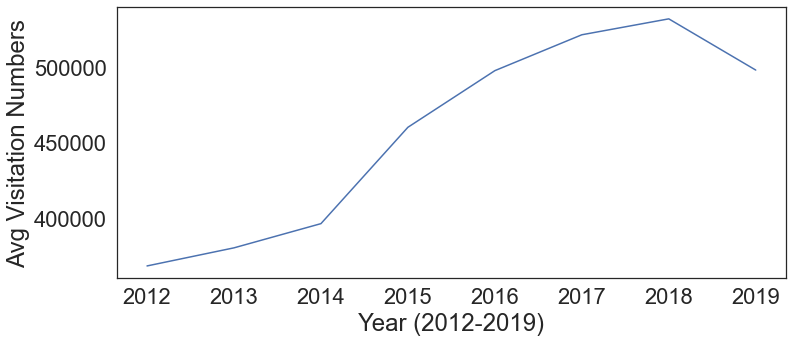

In [86]:
plt.plot('Year', 'GRCA Yearly Average Visitation Numbers', data=df_GRCA_12_19)
plt.xlabel('Year (2012-2019)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

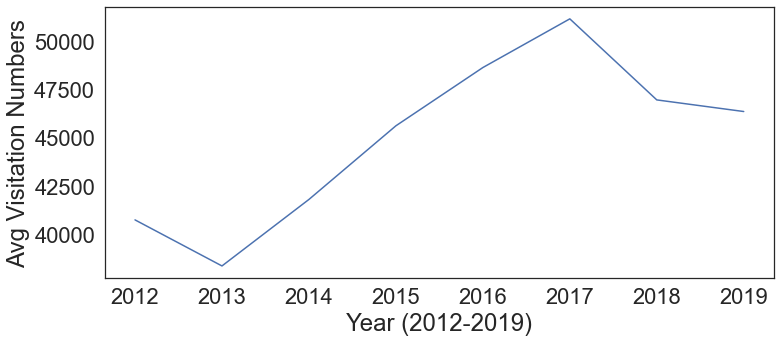

In [53]:
plt.plot('Year', 'MEVE Yearly Average Visitation Numbers', data=df_MEVE_12_19)
plt.xlabel('Year (2012-2019)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

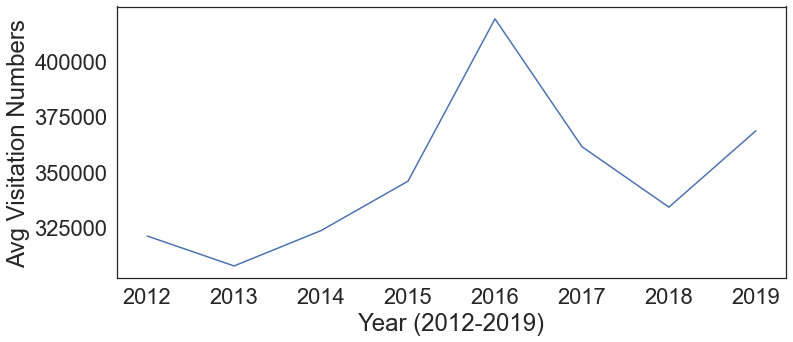

In [54]:
plt.plot('Year', 'YOSE Yearly Average Visitation Numbers', data=df_YOSE_12_19)
plt.xlabel('Year (2012-2019)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

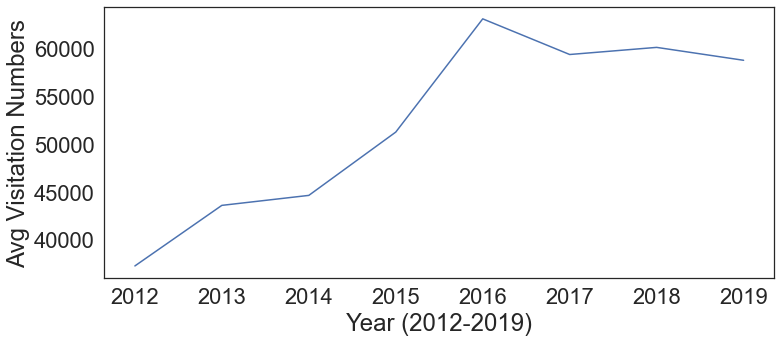

In [55]:
plt.plot('Year', 'CRLA Yearly Average Visitation Numbers', data=df_CRLA_12_19)
plt.xlabel('Year (2012-2019)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

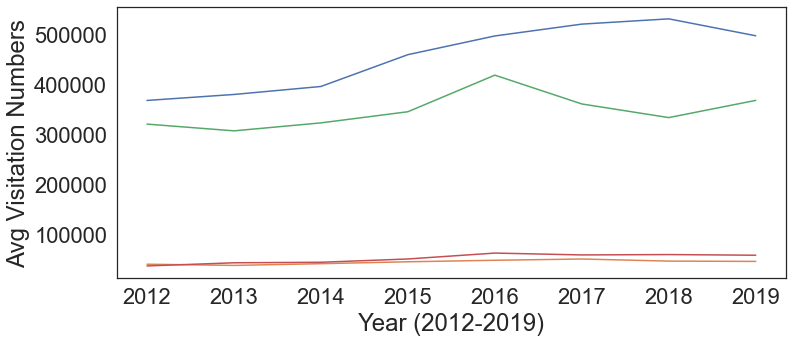

In [57]:
plt.plot('Year', 'GRCA Yearly Average Visitation Numbers', data=df_GRCA_12_19)
plt.plot('Year', 'MEVE Yearly Average Visitation Numbers', data=df_MEVE_12_19)
plt.plot('Year', 'YOSE Yearly Average Visitation Numbers', data=df_YOSE_12_19)
plt.plot('Year', 'CRLA Yearly Average Visitation Numbers', data=df_CRLA_12_19)
plt.xlabel('Year (2012-2019)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

Next, we get the yearly park visitation averages during the pandemic (2020-2021) and display the data.

In [61]:
# filter out data before 2020
df_GRCA_20_21 = df_GRCA[df_GRCA['Year'] > 2019]
df_MEVE_20_21 = df_MEVE[df_MEVE['Year'] > 2019]
df_YOSE_20_21 = df_YOSE[df_YOSE['Year'] > 2019]
df_CRLA_20_21 = df_CRLA[df_CRLA['Year'] > 2019]


In [62]:
# check that the stored dataset contains only 2020-2021 data
df_GRCA_20_21['Year'].unique()

array([2021, 2020], dtype=int64)

In [63]:
# apply the yearly_avg function from earlier
df_GRCA_20_21 = yearly_avg(df_GRCA_20_21, NPs[0])
df_MEVE_20_21 = yearly_avg(df_MEVE_20_21, NPs[1])
df_YOSE_20_21 = yearly_avg(df_YOSE_20_21, NPs[2])
df_CRLA_20_21 = yearly_avg(df_CRLA_20_21, NPs[3])

In [64]:
# look at the yearly average NP visitation rates for years 2020-2021
df_GRCA_20_21.head()

,Year,GRCA Yearly Average Visitation Numbers
0,2021,377723.083333
1,2020,241424.833333


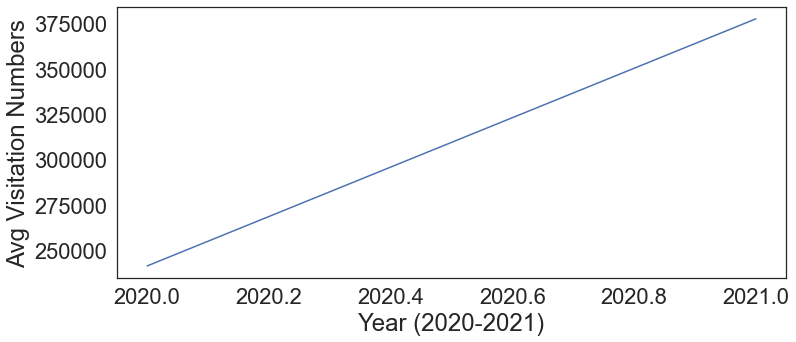

In [65]:
plt.plot('Year', 'GRCA Yearly Average Visitation Numbers', data=df_GRCA_20_21)
plt.xlabel('Year (2020-2021)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

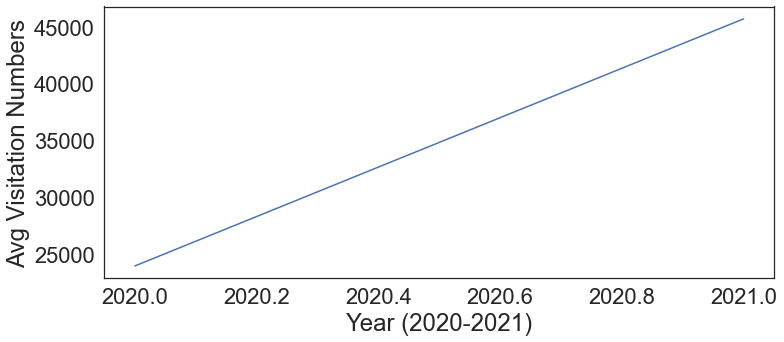

In [66]:
plt.plot('Year', 'MEVE Yearly Average Visitation Numbers', data=df_MEVE_20_21)
plt.xlabel('Year (2020-2021)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

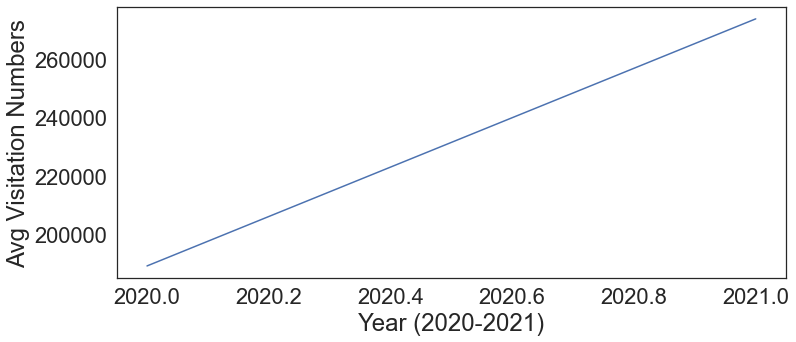

In [67]:
plt.plot('Year', 'YOSE Yearly Average Visitation Numbers', data=df_YOSE_20_21)
plt.xlabel('Year (2020-2021)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

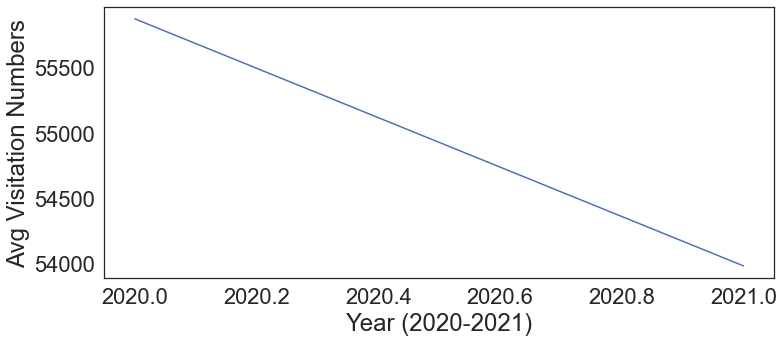

In [68]:
plt.plot('Year', 'CRLA Yearly Average Visitation Numbers', data=df_CRLA_20_21)
plt.xlabel('Year (2020-2021)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

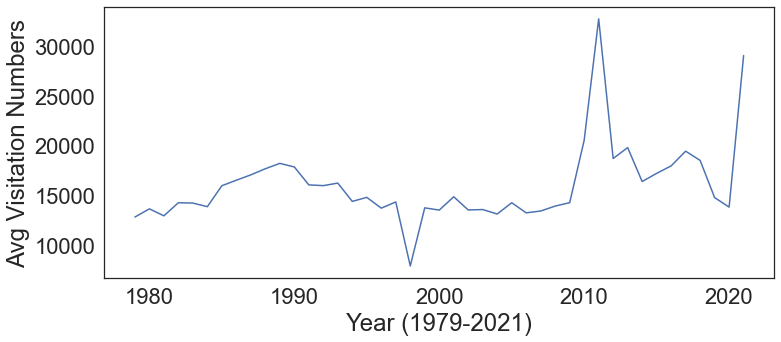

In [300]:
plt.plot('Year', 'PINN Yearly Average Visitation Numbers', data=df_PINN_79_21)
plt.xlabel('Year (1979-2021)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

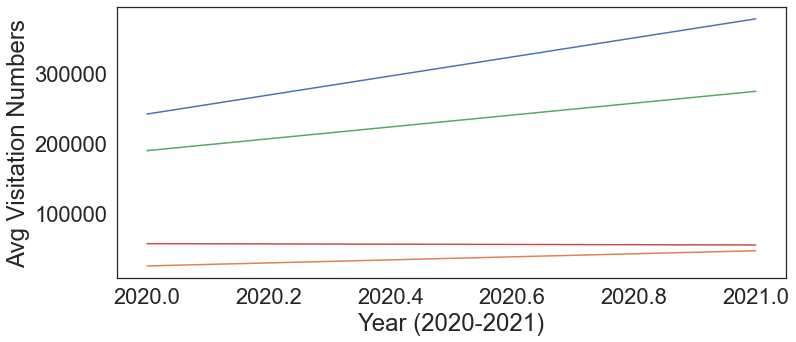

In [69]:
plt.plot('Year', 'GRCA Yearly Average Visitation Numbers', data=df_GRCA_20_21)
plt.plot('Year', 'MEVE Yearly Average Visitation Numbers', data=df_MEVE_20_21)
plt.plot('Year', 'YOSE Yearly Average Visitation Numbers', data=df_YOSE_20_21)
plt.plot('Year', 'CRLA Yearly Average Visitation Numbers', data=df_CRLA_20_21)
plt.xlabel('Year (2020-2021)')
plt.ylabel('Avg Visitation Numbers')
plt.show()

Now, we want to explore the relationship between the 2012-2019 and 2020-2021 dataframes. # ideas: lmplot, scatterplot, lineplot, subplot

In [303]:
# NOTE : possibly merge the dataframes by time periods (i.e. 1979-2019 and 1979-2021)